In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



#Завантаження набіру даних.
data_cancer = load_breast_cancer()

print(data_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
X = data_cancer.data
y = data_cancer.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Застосувати SVM і Random Forest для визначення важливих ознак.
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

svm_pr = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pr)
print(f"SVM - {svm_acc:.4f}")

#Random forest
rf_cl = RandomForestClassifier(random_state = 42)
rf_cl.fit(X_train, y_train)

rf_pred = rf_cl.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)

print(f"Random Forest - {rf_acc:.4f}")

rf_importance = rf_cl.feature_importances_
print("Важливі ознаки:", rf_importance)




SVM - 0.9561
Random Forest - 0.9649
Важливі ознаки [0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]


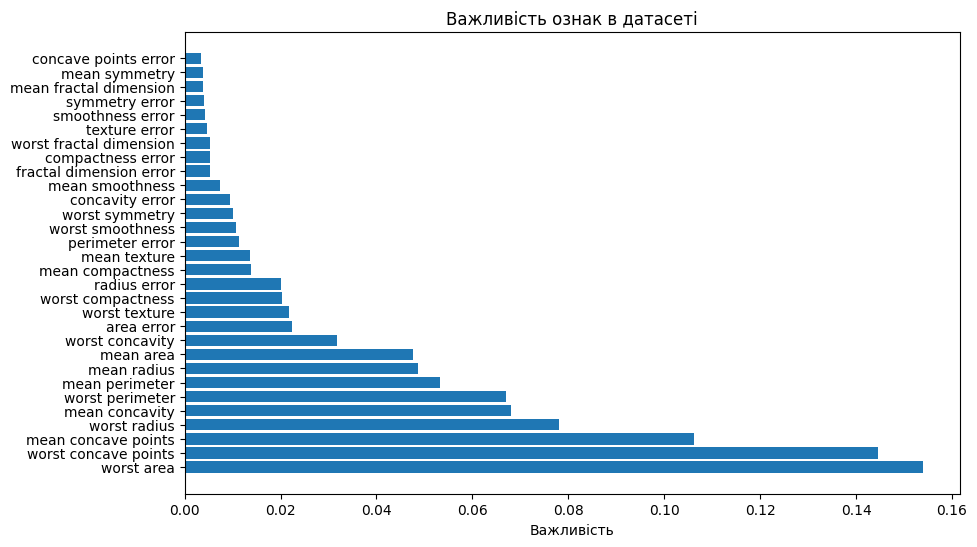

In [20]:
#Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.
feature_importance = rf_cl.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': data_cancer.feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Побудова графіка важливості ознак.
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Важливість')
plt.title('Важливість ознак в датасеті')
plt.show()

На графіку видно що найбільшими чинниками раку є: worst area, worst concave points, mean concave points, worst radius.

In [22]:
#Обчислити точність для двох алгоритмів і порівняти результати
svm_pr = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pr)

rf_pred = rf_cl.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Точність SVM: ", svm_acc)

print("Точність Random Forest: ", rf_accuracy)

if svm_acc > rf_accuracy:
    print("Алгоритм SVM ефективніший")
elif svm_acc < rf_accuracy:
    print("Алгоритм Random Forest ефективніший")
else:
    print("Aлгоритми мають однакову ефективність")

Точність SVM:  0.956140350877193
Точність Random Forest:  0.9649122807017544
Алгоритм Random Forest ефективніший


Висновок: В ході виконання роботи було використано набір даних Breast Cancer. Застосовано модель RandomForestClassifier для аналізу важливості кожної ознаки.